In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd


import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist


from utils import make_stopwords
from wordcloud import WordCloud

In [6]:
sw = make_stopwords()
all_books_nosw_singularized = pd.read_pickle('data/allbooks_sing_nosw.pkl')
english_words = set(nltk.corpus.words.words())

In [38]:
def get_pos(text_string, pos_list):
    """
    Return list of words belonging to the parts of speech in pos_list
    """
    tokens = word_tokenize(text_string)
    tokens_pos = nltk.pos_tag(tokens)
    words = [word[0] for word in tokens_pos if word[1][:2] in pos_list]
    return words

def make_exclusive_lists(jordan_list, sanderson_list, lim1=None, lim2=None):
    """
    Return a string of all the words used exclusively by Jordan/Sanderson, where the strings will have multiple
    instances of the word so wordcloud will be able to graph it properly. lim1 and lim2 index the range of the most 
    common words that will be used, so setting them may caputre words that Jordan used a lot, but Sanderson only
    used once.
    """
    
    jordan_dist = FreqDist(jordan_list)
    sanderson_dist = FreqDist(sanderson_list)
    
    #set of index lim1 to index lim2 most common words in the specific parts of speech of each authors
    jordan_set = set([item[0] for item in jordan_dist.most_common()[lim1:lim2]])
    sanderson_set = set([item[0] for item in sanderson_dist.most_common()[lim1:lim2]])
    
    jordan_only = jordan_set.difference(sanderson_set)
    sanderson_only = sanderson_set.difference(jordan_set)
    
    excluded_words = ['androl', 'loral', 'armrest']
    
    jordan_string = ' '.join([word for word in jordan_list if word in jordan_only and word not in excluded_words])
    sanderson_string = ' '.join([word for word in sanderson_list if word in sanderson_only and word not in excluded_words])
    
    return jordan_string, sanderson_string

def draw_wordcloud(author_string,title=''):
    wordcloud = WordCloud(width = 1200, height = 1200, 
                background_color ='white', 
                stopwords = sw, 
                min_font_size = 12).generate(author_string) 
    
    plt.figure(figsize = (12, 12), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.title(title, fontsize = 48)
    plt.axis("off") 
    plt.tight_layout(pad = 0)  
    plt.show() 

In [7]:
#Series of chapters RJ wrote
jordan_books = all_books_nosw_singularized.iloc[:515]['text']

#tokenized words RJ wrote
jordan_text = ' '.join(jordan_books).split()

#English words only
jordan_text_eng = [word for word in jordan_text if word in english_words]

In [8]:
#Series of chapters BS wrote
sanderson_books = all_books_nosw_singularized.iloc[515:]['text']

#tokenized words BS wrote
sanderson_text = ' '.join(sanderson_books).split()

#English words only
sanderson_text_eng = [word for word in sanderson_text if word in english_words]


In [12]:
j_v_adj_adv = get_pos(' '.join(jordan_text_eng),['JJ', 'RB', 'VB'])

In [10]:
s_v_adj_adv = get_pos(' '.join(sanderson_text_eng),['JJ', 'RB', 'VB'])

In [30]:
j, s = make_exclusive_lists(j_v_adj_adv, s_v_adj_adv)

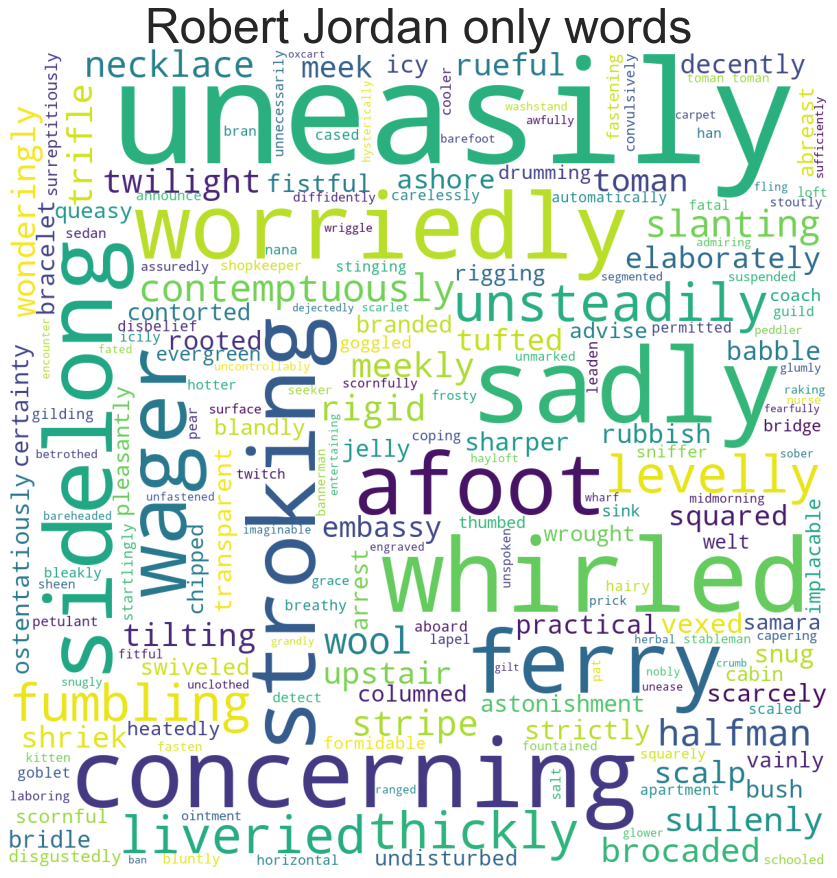

In [39]:
draw_wordcloud(j,'Robert Jordan only words')

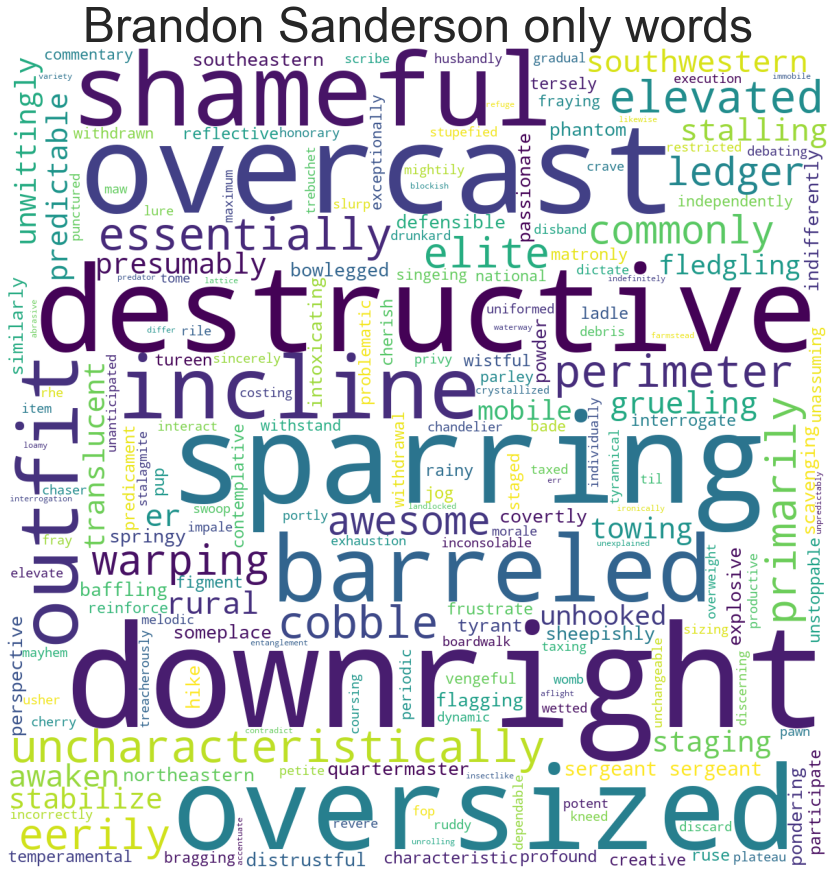

In [40]:
draw_wordcloud(s,'Brandon Sanderson only words')

These actually match up well with how a lot of people think about these two authors. Jordan uses a lot of flowery adverbs, whereas Sanderson's writing tends to be straightforward and action oriented.